In [2]:
# To perform API calls to collect Trump's last two weeks tweets 
# Set up dependencys
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import csv
from textblob import TextBlob
from tweepy import OAuthHandler
from wordcloud import WordCloud, STOPWORDS


#Twitter API credentials
CONSUMER_KEY = "Ss6nLO2amUVA5HZi2GbNQqgQD"
CONSUMER_SECRET = "RiJG2qRtsncRSWeUxH67flguctUlzS1XTnCkOXObOTFkPA2Rd5"
ACCESS_KEY = "1256890520510648320-Op1hYQr9qmqywncmD7ymfnH6uOrkqz"
ACCESS_SECRET = "8r8voYsYpY0keInUGAU5AErNtChtHnmfVFSAmiGWGWN3e"

auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
 
api = tweepy.API(auth)

In [3]:
tweets = api.user_timeline(screen_name ="realDonaldTrump", count=200)
for tweet in tweets[:5]:
    print(tweet.text)
    print()

RT @GOPChairwoman: "China and who can best rebuild our economy will be the dominant issues on Election Day and that’s bad news for Joe Bide…

Hello to India! https://t.co/iiR20ZLKrE

I’ll do it again! https://t.co/ND3yBfM1lJ

My Hero. New York’s Finest! https://t.co/KOhZ6BHhxc

RT @DonaldJTrumpJr: Joe #BeijingBiden has spent the last half century in politics putting China first! Only @realDonaldTrump will always pu…



In [4]:

# Create dataframe of the tweets
tweet_data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
tweet_data.head()

,Tweets
0,"RT @GOPChairwoman: ""China and who can best reb..."
1,Hello to India! https://t.co/iiR20ZLKrE
2,I’ll do it again! https://t.co/ND3yBfM1lJ
3,My Hero. New York’s Finest! https://t.co/KOhZ6...
4,RT @DonaldJTrumpJr: Joe #BeijingBiden has spen...


In [5]:
# Added data in the dataframe and export to csv to process later
tweet_data['len'] = np.array([len(tweet.text) for tweet in tweets])
tweet_data['ID'] = np.array([tweet.id for tweet in tweets])
tweet_data['Date'] =np.array([tweet.created_at for tweet in tweets])
tweet_data['Source'] = np.array([tweet.source for tweet in tweets])
tweet_data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
tweet_data['RT'] = np.array([tweet.retweet_count for tweet in tweets])
tweet_data.to_csv("trump.csv")
tweet_data.head()

,Tweets,len,ID,Date,Source,Likes,RT
0,"RT @GOPChairwoman: ""China and who can best reb...",140,1261514511057641472,2020-05-16 04:31:11,Twitter for iPhone,0,3552
1,Hello to India! https://t.co/iiR20ZLKrE,39,1261514269822201856,2020-05-16 04:30:14,Twitter for iPhone,77874,16586
2,I’ll do it again! https://t.co/ND3yBfM1lJ,41,1261512626028318720,2020-05-16 04:23:42,Twitter for iPhone,60579,14452
3,My Hero. New York’s Finest! https://t.co/KOhZ6...,51,1261511702253916160,2020-05-16 04:20:02,Twitter for iPhone,30140,6672
4,RT @DonaldJTrumpJr: Joe #BeijingBiden has spen...,140,1261511271062659073,2020-05-16 04:18:19,Twitter for iPhone,0,6366


In [6]:

# Open csvfile for Trump's tweet
data = pd.read_csv("trump.csv")
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Tweets,len,ID,Date,Source,Likes,RT
0,"RT @GOPChairwoman: ""China and who can best reb...",140,1261514511057641472,2020-05-16 04:31:11,Twitter for iPhone,0,3552
1,Hello to India! https://t.co/iiR20ZLKrE,39,1261514269822201856,2020-05-16 04:30:14,Twitter for iPhone,77874,16586
2,I’ll do it again! https://t.co/ND3yBfM1lJ,41,1261512626028318720,2020-05-16 04:23:42,Twitter for iPhone,60579,14452
3,My Hero. New York’s Finest! https://t.co/KOhZ6...,51,1261511702253916160,2020-05-16 04:20:02,Twitter for iPhone,30140,6672
4,RT @DonaldJTrumpJr: Joe #BeijingBiden has spen...,140,1261511271062659073,2020-05-16 04:18:19,Twitter for iPhone,0,6366


In [7]:
# To get tweet with maximum likes, maximum retweets, minimum likes
fav_max = np.max(data['Likes'])
rt_max = np.max(data['RT'])
fav_min = np.min(data['Likes'])
fav = data[data.Likes == fav_max].index[0]
rt = data[data.RT == rt_max].index[0]
fav_tweet = data['Tweets'][fav]
rt_tweet = data['Tweets'][rt]
least_fav = data['Tweets'][fav_min]

In [8]:

print(f"The tweet with maximum likes is : \n{fav_tweet}")
print(f"Number of likes: {fav_max}")
print(f"\nThe tweet with more retweets is: \n{rt_tweet}")
print(f"Number of retweets: {rt_max}")
print(f"\nThe tweet with minimum likes is : \n{least_fav}")
print(f"Number of likes: {fav_min}")

The tweet with maximum likes is : 
OBAMAGATE!
Number of likes: 391706

The tweet with more retweets is: 
RT @realDonaldTrump: OBAMAGATE!
Number of retweets: 99607

The tweet with minimum likes is : 
RT @GOPChairwoman: "China and who can best rebuild our economy will be the dominant issues on Election Day and that’s bad news for Joe Bide…
Number of likes: 0


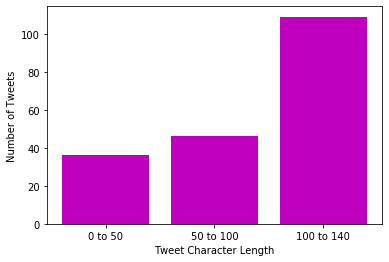

In [10]:

# To create the plot of tweet characters length.
bins=[0,75,125,140]
group_labels=["0 to 50","50 to 100","100 to 140"]
data['len_group']= pd.cut(data['len'], bins, labels=group_labels)
y= data['len_group'].value_counts()
y = y.sort_values(ascending=True)
x=np.arange(0, len(group_labels))
tick=[x for x in x]
plt.xticks(tick,group_labels)
plt.ylabel("Number of Tweets")
plt.xlabel("Tweet Character Length")
plt.bar(x,y, color='m')
plt.savefig("Tweetlength")
plt.show()

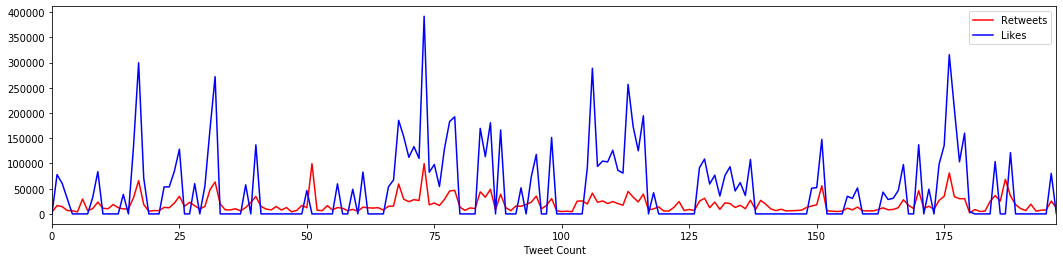

In [11]:

#To plot the retweets and likes on Trump's tweet
RT_t = pd.Series(data = data['RT'].values)
fav_t = pd.Series(data = data['Likes'].values)
RT_t.plot(figsize =(18,4),label="Retweets", color ='r',legend=True)
fav_t.plot(figsize=(18,4), label="Likes", color = 'b', legend=True)
plt.xlabel("Tweet Count")
plt.savefig("RT-likes")

In [14]:
# function to clean tweet and to perform sentiment analysis
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",tweet).split())
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity >0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
data['SA'] = np.array([analyze_sentiment(tweet) for tweet in data["Tweets"]])
data.head()

,Tweets,len,ID,Date,Source,Likes,RT,len_group,SA
0,"RT @GOPChairwoman: ""China and who can best reb...",140,1261514511057641472,2020-05-16 04:31:11,Twitter for iPhone,0,3552,100 to 140,1
1,Hello to India! https://t.co/iiR20ZLKrE,39,1261514269822201856,2020-05-16 04:30:14,Twitter for iPhone,77874,16586,0 to 50,0
2,I’ll do it again! https://t.co/ND3yBfM1lJ,41,1261512626028318720,2020-05-16 04:23:42,Twitter for iPhone,60579,14452,0 to 50,0
3,My Hero. New York’s Finest! https://t.co/KOhZ6...,51,1261511702253916160,2020-05-16 04:20:02,Twitter for iPhone,30140,6672,0 to 50,1
4,RT @DonaldJTrumpJr: Joe #BeijingBiden has spen...,140,1261511271062659073,2020-05-16 04:18:19,Twitter for iPhone,0,6366,100 to 140,-1


In [15]:

#To prepare the list of positive, negative and neutral tweets
positive =[]
negative =[]
neutral =[]
for value in data['SA']:
    if value >0:
        positive.append(data['Tweets'])
    elif value <0:
        negative.append(data['Tweets'])
    else:
        neutral.append(data['Tweets'])

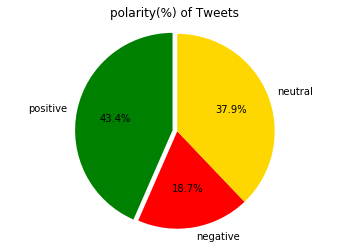

In [16]:
# to plot polarity(%) of Trump's tweet
tweet_count =[len(positive),len(negative),len(neutral)]
labels = ["positive", "negative", "neutral"]
colors =['g','r','gold']
explode=(0.05,0,0)
plt.pie(tweet_count,labels=labels,explode=explode,colors=colors, autopct="%0.1f%%", startangle=90)
plt.title("polarity(%) of Tweets")
plt.axis("equal")
plt.savefig("TrumpPolarity")
plt.show()

In [17]:
import nltk

In [18]:
# Tokenization of tweets
data['tidy tweet'] = np.array([clean_tweet(tweet) for tweet in data['Tweets']])
token_tweet = data['tidy tweet'].apply(lambda x: x.split())
token_tweet.head()

0    [RT, China, and, who, can, best, rebuild, our,...
1                                   [Hello, to, India]
2                               [I, ll, do, it, again]
3                     [My, Hero, New, York, s, Finest]
4    [RT, Joe, BeijingBiden, has, spent, the, last,...
Name: tidy tweet, dtype: object

In [19]:

for i in range(len(token_tweet)):
    token_tweet[i] = ' '.join(token_tweet[i])
data['tidy tweet'] = token_tweet
data.head()

,Tweets,len,ID,Date,Source,Likes,RT,len_group,SA,tidy tweet
0,"RT @GOPChairwoman: ""China and who can best reb...",140,1261514511057641472,2020-05-16 04:31:11,Twitter for iPhone,0,3552,100 to 140,1,RT China and who can best rebuild our economy ...
1,Hello to India! https://t.co/iiR20ZLKrE,39,1261514269822201856,2020-05-16 04:30:14,Twitter for iPhone,77874,16586,0 to 50,0,Hello to India
2,I’ll do it again! https://t.co/ND3yBfM1lJ,41,1261512626028318720,2020-05-16 04:23:42,Twitter for iPhone,60579,14452,0 to 50,0,I ll do it again
3,My Hero. New York’s Finest! https://t.co/KOhZ6...,51,1261511702253916160,2020-05-16 04:20:02,Twitter for iPhone,30140,6672,0 to 50,1,My Hero New York s Finest
4,RT @DonaldJTrumpJr: Joe #BeijingBiden has spen...,140,1261511271062659073,2020-05-16 04:18:19,Twitter for iPhone,0,6366,100 to 140,-1,RT Joe BeijingBiden has spent the last half ce...


In [20]:

pos_word =' '.join([text for text in data['tidy tweet'][data['SA'] == 1]])
neutral_word=' '.join([text for text in data['tidy tweet'][data['SA'] == 0]])

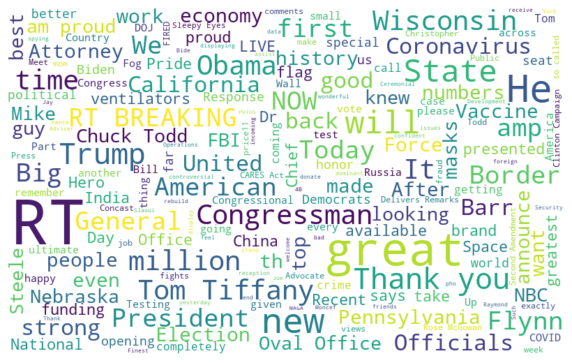

In [21]:
#Generate wordcloud of positive tweets
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=800, height=500, background_color='white',stopwords=stopwords, max_font_size=90).generate(pos_word)
plt.figure(figsize=(10, 7), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('TrumpPos', bbox_inches='tight')

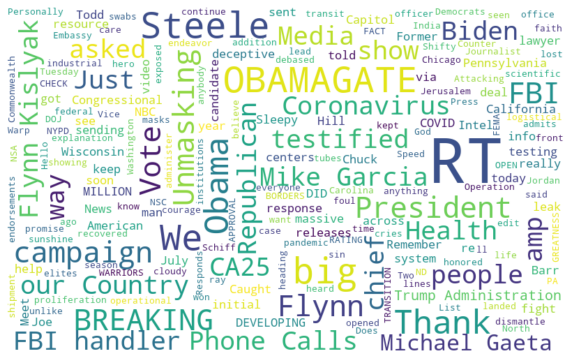

In [22]:

#wordcloud of neutral tweets
wordcloud2 = WordCloud(width=800, height=500,  max_font_size=90, background_color='white').generate(neutral_word)
plt.figure(figsize=(10, 7), facecolor=None)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')
plt.savefig('TrumpNeut', bbox_inches='tight')